In [98]:
import pandas as pd
from pycirclize import Circos
from pycirclize.parser import Matrix

from pathlib import Path

import sys

sys.path.append("../scripts")

from shared import IVY_COLORS
from lcc import LCC_CLASSIFICATION, LCC_TO_AREA, LCC_TOP_CLASSIFICATION

In [99]:
df = pd.read_csv("../data/derived/all_records.csv")
df.head()

,Date,System,From,To,OriginLocation,DestinationLocation,Type,CallNumber
0,2023-09-17 22:54:42 UTC,BorrowDirect,University of Chicago,Dartmouth College,Social Work Library,Baker-Berry,Non-article,E185.86.H379 2019
1,2023-09-17 22:54:42 UTC,BorrowDirect,Cornell University,Dartmouth College,Olin Library,Baker-Berry,Non-article,E185.86 .H379 2019
2,2023-12-11 13:49:24 UTC,BorrowDirect,Yale University,Dartmouth College,"SML, Stacks, LC Classification",Baker-Berry,Non-article,BV823 .C627X 2014 (LC)
3,2023-12-30 23:03:49 UTC,BorrowDirect,Duke University,Dartmouth College,Perkins/Bostock Library,Baker-Berry,Non-article,DE1 .S7833 v.1-4
4,2023-12-29 20:12:26 UTC,BorrowDirect,University of Chicago,Dartmouth College,Regenstein,Baker-Berry,Non-article,HQ1064.U5 M395 1997


In [100]:
link_cmap = []
for partner, color in IVY_COLORS.items():
    link_cmap.append(("Dartmouth College", partner, color))

In [101]:
institutions = [
    "Brown University",
    "Columbia University Libraries",
    "Cornell University",
    "Duke University",
    "Harvard University",
    "Johns Hopkins University",
    "Massachusetts Institute of Technology",
    "Princeton University",
    "Stanford University",
    "University of Pennsylvania",
    "University of Chicago",
    "Yale University",
]

In [102]:
def make_chord(df: pd.DataFrame, order):
    matrix = Matrix.parse_fromto_table(df)
    circos = Circos.initialize_from_matrix(
        matrix,
        start=-265,
        end=95,
        space=5,
        r_lim=(93, 100),
        cmap=IVY_COLORS,
        link_cmap=link_cmap,
        order=order,
        label_kws=dict(
            size=8, color="black", adjust_rotation=True, orientation="vertical"
        ),
        link_kws=dict(ec="black", lw=0.5, direction=1),
    )
    fig = circos.plotfig()
    return fig

## Clean call numbers


In [103]:
df = df.dropna(subset="CallNumber")

df = df[df.CallNumber.apply(lambda x: x[:2].isupper())]

In [104]:
def get_class(lcc: str) -> str:
    return LCC_TOP_CLASSIFICATION.get(lcc[0])


def get_area(lcc: str) -> str:
    return LCC_TO_AREA.get(lcc[0])


def get_subclass(lcc: str) -> str:
    if lcc[:2].isalpha():
        return LCC_CLASSIFICATION.get(lcc[:2])
    if lcc[0].isalpha():
        return LCC_CLASSIFICATION.get(lcc[0])
    return None


df["Area"] = df.CallNumber.apply(get_area)
df["Class"] = df.CallNumber.apply(get_class)
df["Subclass"] = df.CallNumber.apply(get_subclass)
df = df.dropna(subset="Subclass")
df

,Date,System,From,To,OriginLocation,DestinationLocation,Type,CallNumber,Area,Class,Subclass
0,2023-09-17 22:54:42 UTC,BorrowDirect,University of Chicago,Dartmouth College,Social Work Library,Baker-Berry,Non-article,E185.86.H379 2019,Humanities,History of the Americas,History of the Americas
1,2023-09-17 22:54:42 UTC,BorrowDirect,Cornell University,Dartmouth College,Olin Library,Baker-Berry,Non-article,E185.86 .H379 2019,Humanities,History of the Americas,History of the Americas
2,2023-12-11 13:49:24 UTC,BorrowDirect,Yale University,Dartmouth College,"SML, Stacks, LC Classification",Baker-Berry,Non-article,BV823 .C627X 2014 (LC),Humanities,"Philosophy, Psychology, Religion",Practical Theology
3,2023-12-30 23:03:49 UTC,BorrowDirect,Duke University,Dartmouth College,Perkins/Bostock Library,Baker-Berry,Non-article,DE1 .S7833 v.1-4,Humanities,World History,Greco-Roman World
4,2023-12-29 20:12:26 UTC,BorrowDirect,University of Chicago,Dartmouth College,Regenstein,Baker-Berry,Non-article,HQ1064.U5 M395 1997,Social Sciences,Social Sciences,"The family, Marriage, Women"
...,...,...,...,...,...,...,...,...,...,...,...
17960,2023-11-09 13:41:23.963000,RAPID,Dartmouth College,Cornell University,Baker-Berry Library Stacks,NEW: Olin,Article,ML3795 .V607 2023,Music and Arts,Music and Books on Music,Literature on music
17963,2023-11-10 01:11:25.380000,RAPID,Dartmouth College,Harvard University,Baker-Berry Library Stacks,NEW: Widener Library,Article,KBP56 .H46 2021,Social Sciences,Law,Religious law in general. Comparative religiou...
17965,2023-11-10 14:21:28.027000,RAPID,Dartmouth College,Princeton University,BAKER STACKS,"NEW: Interlibrary Services, Firestone",Article,HQ18.55 .S25 2023,Social Sciences,Social Sciences,"The family, Marriage, Women"
17969,2023-11-12 22:38:07.450000,RAPID,Dartmouth College,Cornell University,Baker,NEW: Olin,Article,CN1 .J68 v.3 2020,Humanities,Auxiliary Sciences of History,"Inscriptions, Epigraphy"


In [113]:
# Merge some areas and classes
areas_to_merge = {
    "Language and Literature": "Humanities",
}
classes_to_merge = {
    "Humanities": {
        "History": [
            "World History",
            "History of the Americas",
            "Auxiliary Sciences of History",
        ]
    },
}

for from_area, to_area in areas_to_merge.items():
    df.loc[df.Area == from_area, "Area"] = to_area

for area, mapping in classes_to_merge.items():
    for new_class, old_classes in mapping.items():
        for old_class in old_classes:
            df.loc[(df.Area == area) & (df.Class == old_class), "Class"] = new_class

In [147]:
df[df.Subclass.str.contains("Graphic Design")]

,Date,System,From,To,OriginLocation,DestinationLocation,Type,CallNumber,Area,Class,Subclass,GroupingVar


In [172]:
df[
    df.CallNumber.str.match(
        r"^NK(27[7-9][0-9]|28[0-9]{2}|29[0-9]{2}|30[0-9]{2}|31[0-9]{2}|32[0-2][0-9]|329[0-6])"
    )
]

,Date,System,From,To,OriginLocation,DestinationLocation,Type,CallNumber,Area,Class,Subclass,GroupingVar
14706,2023-04-24 03:13:34 UTC,BorrowDirect,Dartmouth College,Yale University,Sherman Art Library,YALE_circDIV,Non-article,NK2809.P4 W68 1987,Music and Arts,Fine Arts,Decorative arts,Decorative arts
15908,2023-05-23 09:25:44.710000,ILL,Dartmouth College,Massachusetts Institute of Technology,Sherman Art Library Stacks,MIT Libraries,NaN,NK2808 .W33 1982,Music and Arts,Fine Arts,Decorative arts,Decorative arts
16111,2023-06-06 12:27:29.450000,ILL,Dartmouth College,Massachusetts Institute of Technology,Sherman Art Library Stacks,MIT Libraries,NaN,NK2809.P4 G53 2014,Music and Arts,Fine Arts,Decorative arts,Decorative arts
16567,2023-09-26 10:09:42.863000,ILL,Dartmouth College,Massachusetts Institute of Technology,Sherman,MIT Libraries,NaN,NK2808 .W37,Music and Arts,Fine Arts,Decorative arts,Decorative arts
16621,2023-11-08 16:11:13.687000,ILL,Dartmouth College,Columbia University Libraries,Sherman Art Library Folio,Butler Library,NaN,NK2808 .L6,Music and Arts,Fine Arts,Decorative arts,Decorative arts


In [128]:
df[df.CallNumber.str.startswith("NX")]

,Date,System,From,To,OriginLocation,DestinationLocation,Type,CallNumber,Area,Class,Subclass,GroupingVar
119,2023-12-11 20:53:13 UTC,BorrowDirect,Yale University,Dartmouth College,"SML, Stacks, LC Classification",Baker-Berry,Non-article,NX504 L44X 2000 (LC),Music and Arts,Fine Arts,Arts in general,Arts in general
440,2023-11-13 02:55:05 UTC,BorrowDirect,Massachusetts Institute of Technology,Dartmouth College,Hayden Library.,Baker-Berry,Non-article,NX575.8.M66 2018,Music and Arts,Fine Arts,Arts in general,Arts in general
640,2023-10-27 22:24:53 UTC,BorrowDirect,Columbia University Libraries,Dartmouth College,Butler Stacks (Enter at the Butler Circulation...,Baker-Berry,Non-article,NX420 .A14 2020g,Music and Arts,Fine Arts,Arts in general,Arts in general
714,2023-10-23 15:23:07 UTC,BorrowDirect,Brown University,Dartmouth College,Rockefeller Library,Baker-Berry,Non-article,NX180.S6 R44 2019,Music and Arts,Fine Arts,Arts in general,Arts in general
807,2023-10-18 03:43:28 UTC,BorrowDirect,Cornell University,Dartmouth College,Mui Ho Fine Arts Library,Baker-Berry,Non-article,NX650.P63 P75 2009,Music and Arts,Fine Arts,Arts in general,Arts in general
...,...,...,...,...,...,...,...,...,...,...,...,...
15933,2023-02-01 14:18:08.690000,ILL,Dartmouth College,Harvard University,Baker-Berry Library Stacks,Widener Library,NaN,NX650.E46 A39 2018,Music and Arts,Fine Arts,Arts in general,Arts in general
16008,2023-05-24 16:38:22.633000,ILL,Dartmouth College,Johns Hopkins University,Baker-Berry Library Stacks,Milton S. Eisenhower Library,NaN,NX650.A6 A66 1999,Music and Arts,Fine Arts,Arts in general,Arts in general
16713,2023-08-17 10:08:51.227000,ILL,Dartmouth College,Duke University,Baker,Perkins Library,NaN,NX590.A1 A785 v.20 2000,Music and Arts,Fine Arts,Arts in general,Arts in general
16727,2023-01-26 00:03:46.317000,ILL,Dartmouth College,Harvard University,Sherman Art Library Stacks,Widener Library,NaN,NX93.R67 A43 bd.1,Music and Arts,Fine Arts,Arts in general,Arts in general


In [166]:
# Special treatment for Arts
df.loc[df.CallNumber.str.match("N[0-9]"), "Subclass"] = "Art History"
df.loc[df.CallNumber.str.startswith("NX"), "Subclass"] = "Art History"
df.loc[
    df.CallNumber.str.match("Z(593[6-9]|594[0-9]|595[0-6])"),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Art History",
)
df.loc[
    df.CallNumber.str.match("SB(469|47[0-6])"),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Landscape Architecture",
)
df.loc[
    df.CallNumber.str.match(
        r"^NC([1-9]|[1-9][0-9]|[1-7][0-9]{2}|80[0-9]|81[0-9]|82[0-5])\."
    ),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Drawing",
)

df.loc[
    df.CallNumber.str.match(r"NC(84[5-9]|9\d{2}|1[0-8]\d{2}|190[0-9]|194[0-0]\.)"),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Graphic Design",
)

df.loc[
    df.CallNumber.str.match(
        r"NK(37\d{2}|38\d{2}|39\d{2}|40[0-9]{2}|41[0-9]{2}|42[0-9]{2}|43[0-9]{2}|44[0-9]{2}|45[0-9]{2}|46[0-4][0-9]|469[0-5])\."
    ),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Ceramics",
)

df.loc[
    df.CallNumber.str.match(
        r"^NK(64[0-9]{2}|65\d{2}|66\d{2}|67\d{2}|68\\d{2}|69\d{2}|7\d{3}|80[0-9]{2}|81[0-9]{2}|82[0-9]{2}|83[0-9]{2}|84[0-4][0-9]|845[0-9])\."
    ),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Metal",
)

df.loc[
    df.CallNumber.str.match(
        r"^NK(51[0-9]{2}|52[0-9]{2}|53[0-9]{2}|54[0-3][0-9]|5440)\."
    ),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Glass",
)

df.loc[
    df.CallNumber.str.match(
        r"^NK(27[7-9][0-9]|28[0-9]{2}|29[0-9]{2}|30[0-9]{2}|31[0-9]{2}|32[0-2][0-9]|329[0-6])"
    ),
    ["Area", "Class", "Subclass"],
] = (
    "Music and Fine Arts",
    "Fine Arts",
    "Textiles",
)


arts_categories = {
    "Fine Arts": [
        "Painting",
        "Sculpture",
        "Print Media",
        "Photography",
        "Drawing",
        "Art History",
    ],
    "Architecture": [
        "Architecture",
        "Decorative Arts",
        "Landscape Architecture",
    ],
    "Applied Arts": [
        "Graphic Design",
        "Ceramics",
        "Metal",
        "Glass",
        "Textiles",
        "Woodwork",
    ],
}

In [114]:
# Break down some very broad classes into subclasses
USE_SUBCLASS = {
    "Humanities": [],
    "Language and Literature": [],
    "Medicine": ["Medicine"],
    "Music and Arts": ["Fine Arts"],
    "Reference Works:": [],
    "STEM": ["Science"],
    "Social Sciences": [],
}

df["GroupingVar"] = df["Class"]
for area, classes in USE_SUBCLASS.items():
    for class_ in classes:
        df.loc[(df.Area == area) & (df.Class == class_), "GroupingVar"] = df.loc[
            (df.Area == area) & (df.Class == class_), "Subclass"
        ]

In [115]:
borrowed = (
    df[(df.To == "Dartmouth College")]
    .groupby(["From", "Area", "GroupingVar"])
    .size()
    .rename("N")
    .reset_index()
    .rename(columns={"GroupingVar": "To"})
)

# borrowed["N"] = (
#     borrowed.groupby(["From", "Area"])["N"].transform(
#         lambda x: pd.qcut(x, q=4, duplicates="drop", labels=False)
#     )
#     + 1
# )
borrowed

,From,Area,To,N
0,Brown University,Humanities,Auxiliary Sciences of History,4
1,Brown University,Humanities,History,80
2,Brown University,Humanities,Language and Literature,81
3,Brown University,Humanities,"Philosophy, Psychology, Religion",57
4,Brown University,Medicine,Internal medicine,3
...,...,...,...,...
371,Yale University,Social Sciences,Education,5
372,Yale University,Social Sciences,"Geography, Anthropology, Recreation",20
373,Yale University,Social Sciences,Law,6
374,Yale University,Social Sciences,Political Science,27


In [116]:
borrowed = borrowed[["From", "Area", "To", "N"]].sort_values(by="From")
borrowed

,From,Area,To,N
0,Brown University,Humanities,Auxiliary Sciences of History,4
28,Brown University,Social Sciences,Social Sciences,50
27,Brown University,Social Sciences,Political Science,30
26,Brown University,Social Sciences,Law,7
25,Brown University,Social Sciences,"Geography, Anthropology, Recreation",11
...,...,...,...,...
352,Yale University,Music and Arts,Decorative arts,5
353,Yale University,Music and Arts,Drawing. Design. Illustration,3
354,Yale University,Music and Arts,Fine Arts,22
346,Yale University,Medicine,Otorhinolaryngology,1


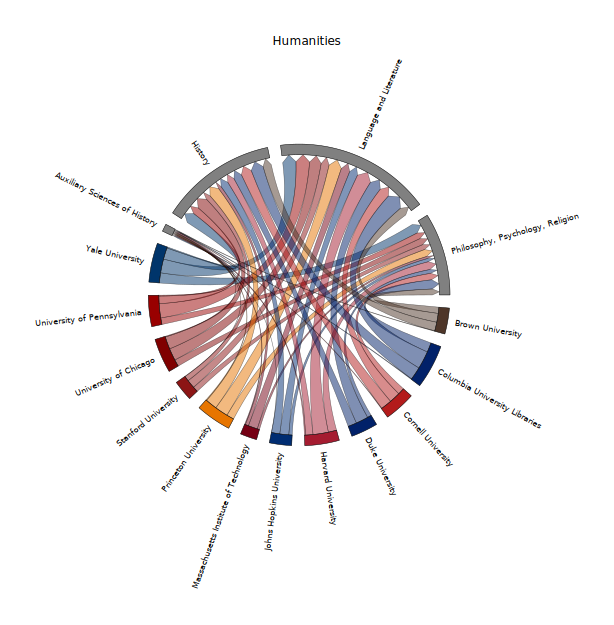

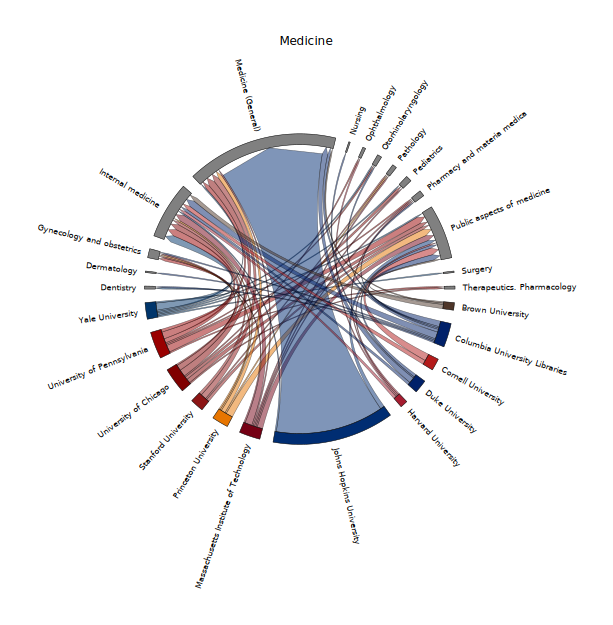

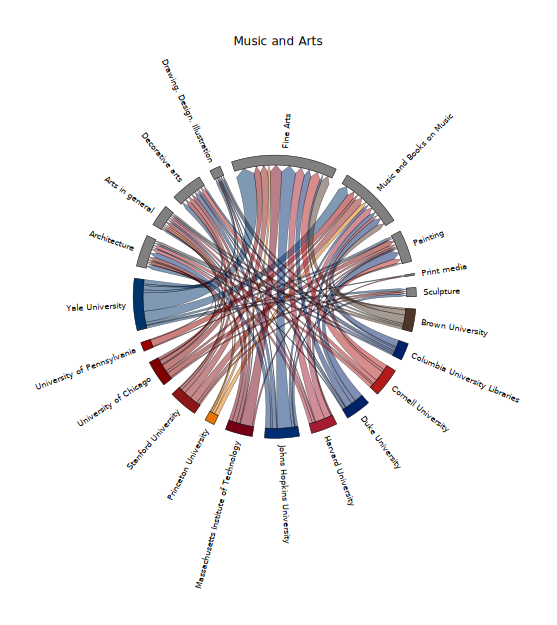

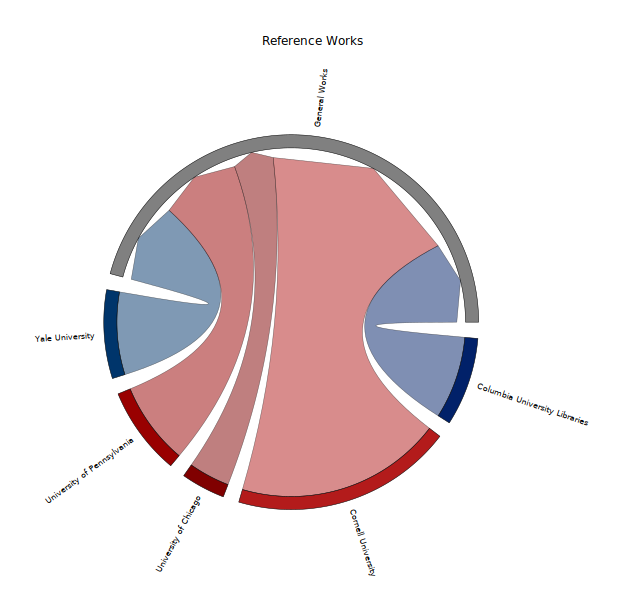

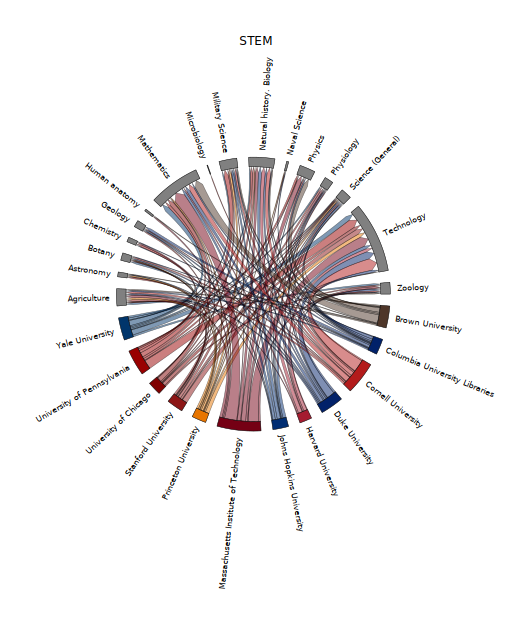

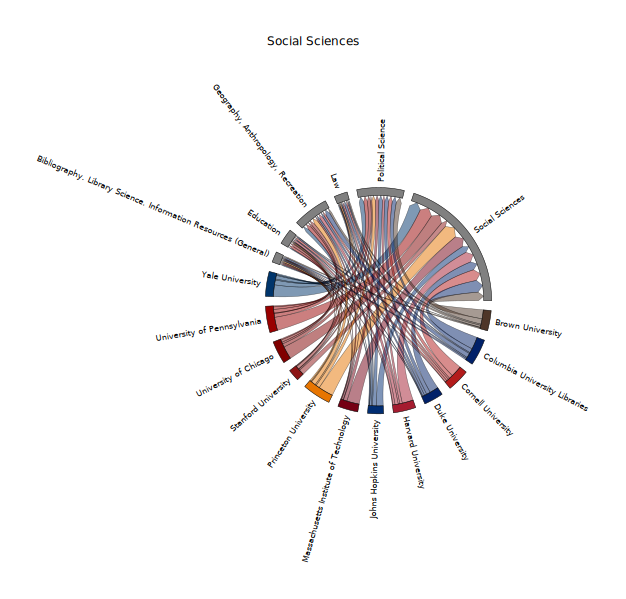

In [117]:
for area, records in borrowed.groupby("Area"):
    order = sorted(records.From.unique()) + sorted(records.To.unique())
    fig = make_chord(records.drop(columns="Area"), order=order)
    fig.savefig(f"out/chord-borrowed-{area}.png", dpi=300)
    records.to_csv(f"out/borrowed-{area}.csv", index=None)
    fig.suptitle(area)

In [118]:
lent = (
    df[(df.From == "Dartmouth College")]
    .groupby(["To", "Area", "GroupingVar"])
    .size()
    .rename("N")
    .reset_index()
)
lent = lent.rename(columns={"GroupingVar": "From"})
lent = lent[["From", "Area", "To", "N"]]
lent

,From,Area,To,N
0,Auxiliary Sciences of History,Humanities,Brown University,5
1,History,Humanities,Brown University,69
2,Language and Literature,Humanities,Brown University,142
3,"Philosophy, Psychology, Religion",Humanities,Brown University,54
4,Dermatology,Medicine,Brown University,1
...,...,...,...,...
453,Education,Social Sciences,Yale University,17
454,"Geography, Anthropology, Recreation",Social Sciences,Yale University,44
455,Law,Social Sciences,Yale University,27
456,Political Science,Social Sciences,Yale University,39


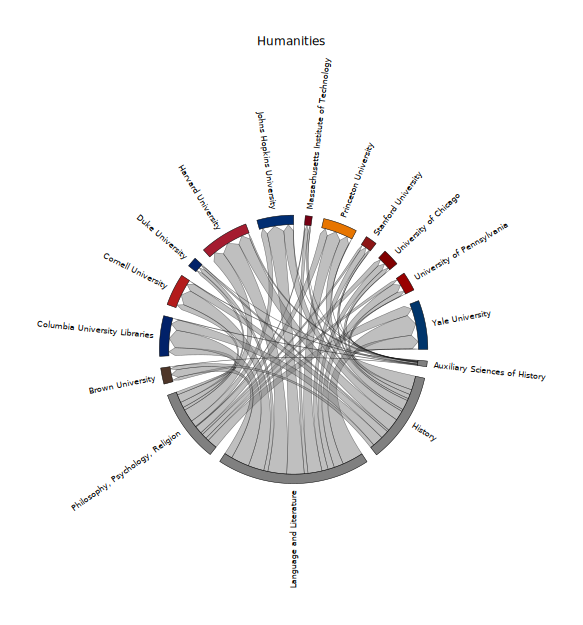

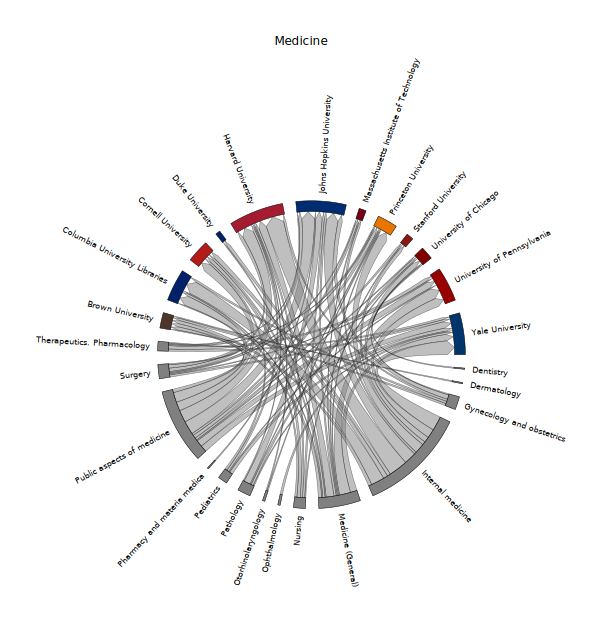

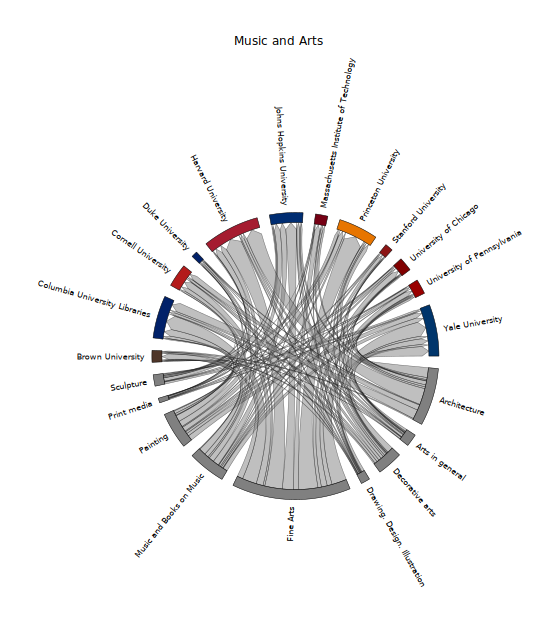

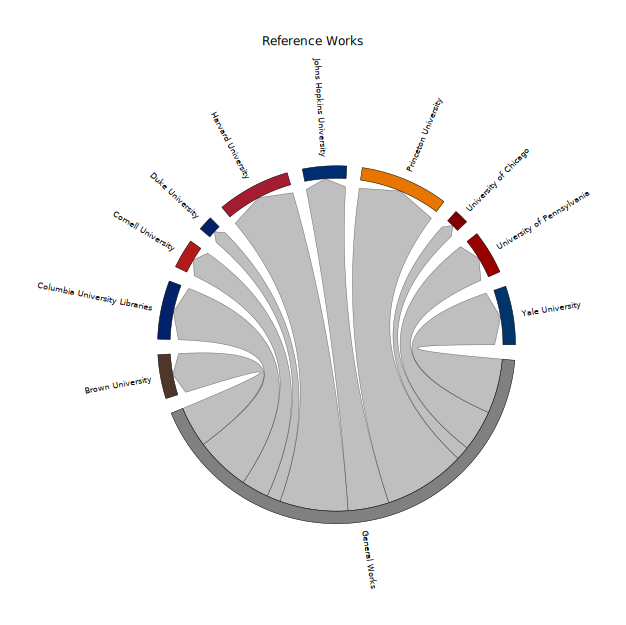

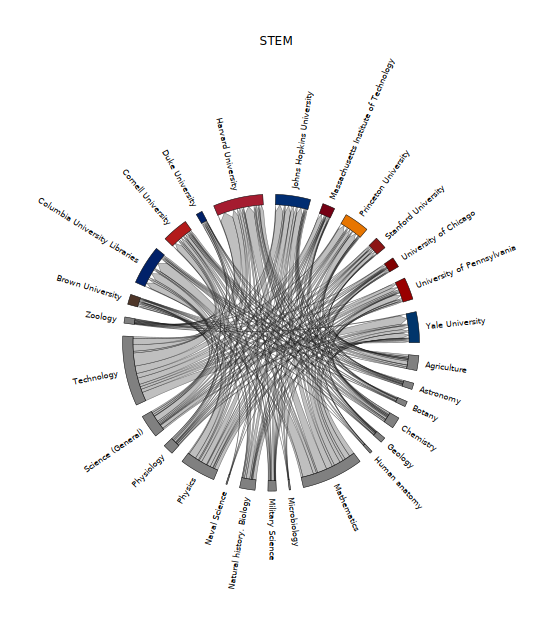

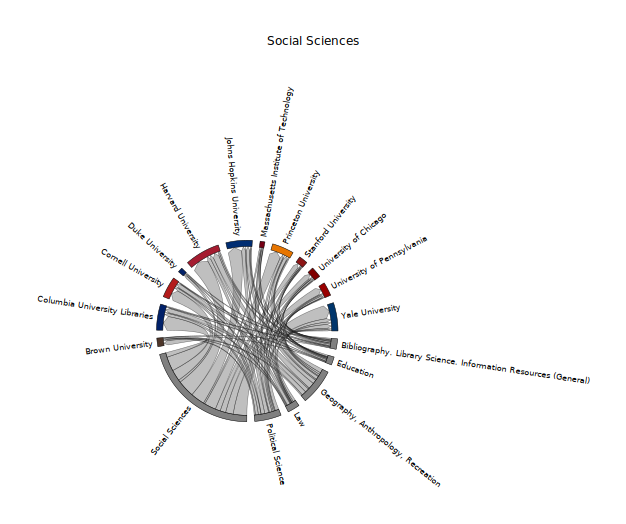

In [119]:
for area, records in lent.groupby("Area"):
    order = sorted(records.From.unique()) + sorted(records.To.unique())
    fig = make_chord(records.drop(columns="Area"), order=order)
    records.to_csv(f"out/lent-{area}.csv", index=None)
    fig.savefig(f"out/chord-lent-{area}.png", dpi=300)
    fig.suptitle(area)